In [52]:
import matplotlib.pyplot as plt
import pathlib
import xarray as xr
import segysak

from segysak.segy import get_segy_texthead, well_known_byte_locs, segy_header_scan

In [25]:
data_path = r'X:\dane_pum_cw10\TNE01_Full\TNE01_Full'
V3D_path = pathlib.Path(data_path)
print("3D", V3D_path, V3D_path.exists())

3D X:\dane_pum_cw10\TNE01_Full\TNE01_Full True


In [26]:
segy_header = get_segy_texthead(V3D_path)
segy_header

Text HeaderC 1 SEGY OUTPUT FROM Petrel 2019.4 Wednesday, October 21 2020 14:19:53          
C 2 Name: TNE01_FULL ÝRealized¨ 1 Type: 3D seismic                              
C 3                                                                             
C 4 First inline: 362    Last inline: 1540                                      
C 5 First xline:  908    Last xline:  3880                                      
C 6 CRS: ST_ED50_UTM31N_P23031_T1133 ÝStatoil,2100005¨                          
C 7 X min: 531854.62 max: 563388.48 delta: 31533.86                             
C 8 Y min: 6731674.15 max: 6771202.25 delta: 39528.10                           
C 9 Time min: -4000.00 max: 4.00 delta: 4004.00                                 
C10 Lat min: 60.42'51.1341"N max: 61.04'22.1371"N delta: 0.21'31.0031"          
C11 Long min: 3.35'1.5768"E max: 4.10'28.3122"E delta: 0.35'26.7354"            
C12 Trace min: -3998.00 max: 2.00 delta: 4000.00                                
C13 Seismic (template) min: -304.74 max: 302.36 delta: 607.11                   
C14 Amplitude (data) min: -304.74 max: 302.36 delta: 607.11                     
C15 Trace sample format: IEEE floating point                                    
C16 Coordinate scale factor: 10.00000                                           
C17                                                                             
C18 Binary header locations:                                                    
C19 Sample interval             : bytes 17-18                                   
C20 Number of samples per trace : bytes 21-22                                   
C21 Trace date format           : bytes 25-26                                   
C22                                                                             
C23 Trace header locations:                                                     
C24 Inline number               : bytes 5-8                                     
C25 Xline number                : bytes 21-24                                   
C26 Coordinate scale factor     : bytes 71-72                                   
C27 X coordinate                : bytes 73-76                                   
C28 Y coordinate                : bytes 77-80                                   
C29 Trace start time/depth      : bytes 109-110                                 
C30 Number of samples per trace : bytes 115-116                                 
C31 Sample interval             : bytes 117-118                                 
C32                                                                             
C33                                                                             
C34                                                                             
C35                                                                             
C36                                                                             
C37                                                                             
C38                                                                             
C39                                                                             
C40 END EBCDIC

In [27]:
scan = segy_header_scan(V3D_path)
scan[scan['std'] > 0]

Processing Chunks:   0%|          | 0.00/1.00 [00:00<?, ? trace-chunks/s]

Reading header:   0%|          | 0.00/1.00k [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,5.005000e+02,288.819436,1.0,250.75,500.5,750.25,1000.0
TraceNumber,13,1000.0,5.005000e+02,288.819436,1.0,250.75,500.5,750.25,1000.0
CDP,21,1000.0,1.907000e+03,577.638872,908.0,1407.50,1907.0,2406.50,2906.0
SourceX,73,1000.0,5.570523e+06,36537.740701,5507333.0,5538928.25,5570523.5,5602118.50,5633714.0
SourceY,77,1000.0,6.749913e+07,62278.028634,67391426.0,67445279.25,67499133.0,67552986.00,67606840.0
CDP_X,181,1000.0,5.570523e+06,36537.740701,5507333.0,5538928.25,5570523.5,5602118.50,5633714.0
CDP_Y,185,1000.0,6.749913e+07,62278.028634,67391426.0,67445279.25,67499133.0,67552986.00,67606840.0
CROSSLINE_3D,193,1000.0,1.907000e+03,577.638872,908.0,1407.50,1907.0,2406.50,2906.0


In [28]:
byte_locs = well_known_byte_locs("petrel_3d")
byte_locs

{'iline': 5, 'xline': 21, 'cdp_x': 73, 'cdp_y': 77}

In [34]:
byte_locs["iline"]

5

In [56]:
cube = xr.open_dataset(
    V3D_path,
    engine="sgy_engine",
    dim_byte_fields={"iline": byte_locs["iline"],
                     "xline": byte_locs["xline"]},
    extra_byte_fields={"cdp_x": byte_locs["cdp_x"],
                       "cdp_y": byte_locs["cdp_y"]},
)

Processing Chunks:   0%|          | 0.00/9.00 [00:00<?, ? trace-chunks/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/100k [00:00<?, ? traces/s]

Reading header:   0%|          | 0.00/77.3k [00:00<?, ? traces/s]

In [57]:
cube

<xarray.Dataset>
Dimensions:  (iline: 590, xline: 1487, samples: 1001)
Coordinates:
  * iline    (iline) int16 362 364 366 368 370 372 ... 1532 1534 1536 1538 1540
  * xline    (xline) int16 908 910 912 914 916 918 ... 3872 3874 3876 3878 3880
  * samples  (samples) float32 -2.0 2.0 6.0 ... 3.99e+03 3.994e+03 3.998e+03
Data variables:
    cdp_x    (iline, xline) int32 ...
    cdp_y    (iline, xline) int32 ...
    data     (iline, xline, samples) float32 ...
Attributes:
    seisnc:   {"coord_scalar": -10.0, "coord_scaled": false}

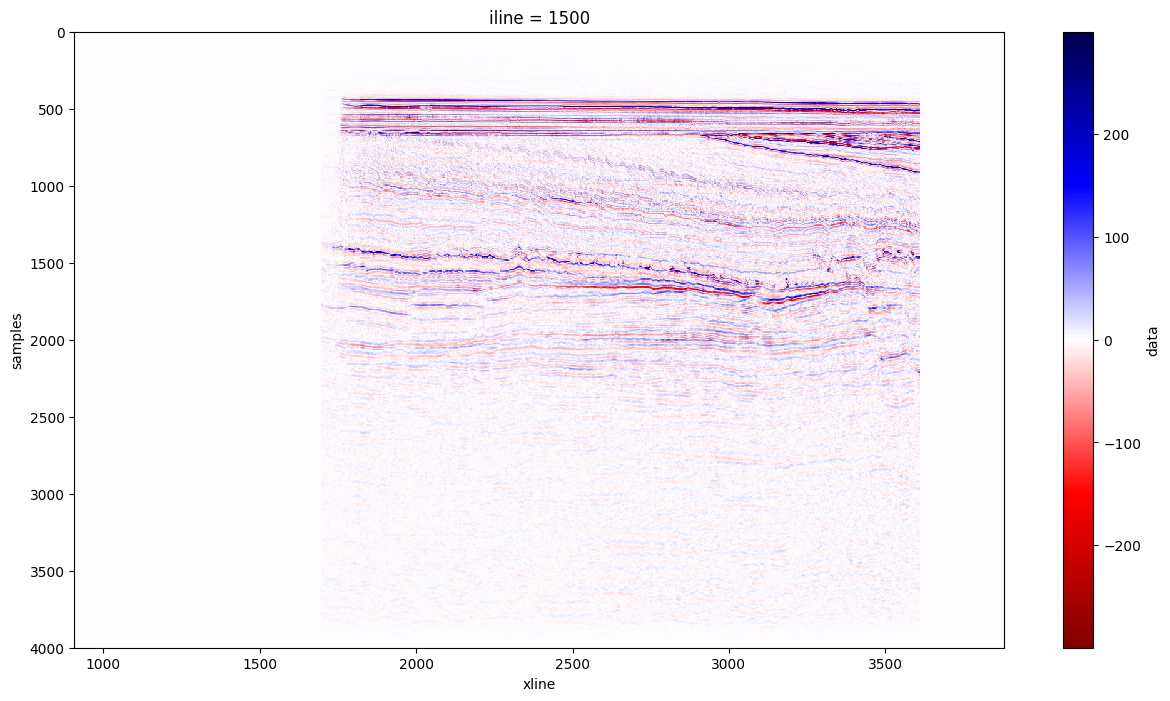

In [59]:
fig, ax = plt.subplots(ncols=1, figsize=(15,8))
iline_sel = 1500
_ = cube.data.transpose("samples", "iline", "xline", transpose_coords=True) \
    .sel(iline=iline_sel) \
    .plot(yincrease=False, cmap='seismic_r')

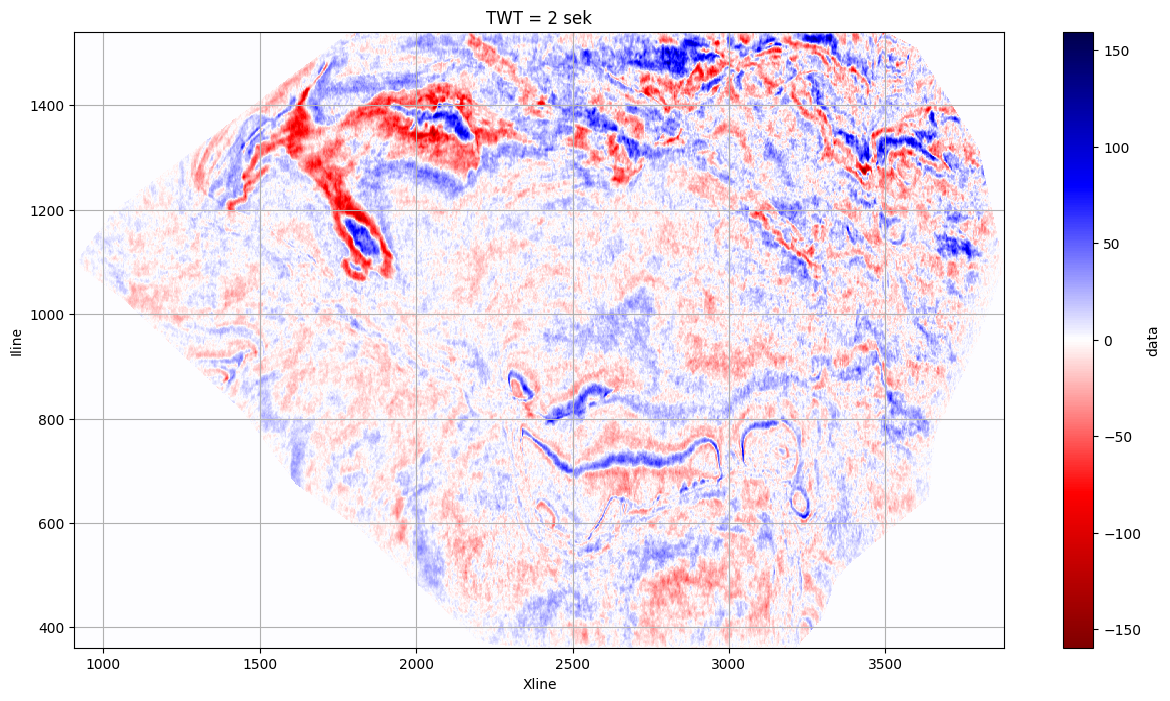

In [62]:
twt_value = 1998
data_at_twt = cube.data.sel(samples=twt_value, method='nearest')

fig, ax = plt.subplots(ncols=1, figsize=(15,8))
data_at_twt.transpose("iline", "xline", transpose_coords=True) \
    .plot(ax=ax, cmap='seismic_r')
plt.grid("grey")
plt.ylabel("Iline")
plt.xlabel("Xline")
plt.title(f"TWT = 2 sek")
plt.show()

In [73]:
iline_range = (500, 1400)
xline_range = (2000, 3000)
twt_range = (1900, 2100)
V3D = cube.sel(
    iline=slice(*iline_range),
    xline=slice(*xline_range),
    samples=slice(*twt_range)
)
V3D

<xarray.Dataset>
Dimensions:  (iline: 451, xline: 501, samples: 50)
Coordinates:
  * iline    (iline) int16 500 502 504 506 508 510 ... 1392 1394 1396 1398 1400
  * xline    (xline) int16 2000 2002 2004 2006 2008 ... 2992 2994 2996 2998 3000
  * samples  (samples) float32 1.902e+03 1.906e+03 ... 2.094e+03 2.098e+03
Data variables:
    cdp_x    (iline, xline) int32 ...
    cdp_y    (iline, xline) int32 ...
    data     (iline, xline, samples) float32 ...
Attributes:
    seisnc:   {"coord_scalar": -10.0, "coord_scaled": false}

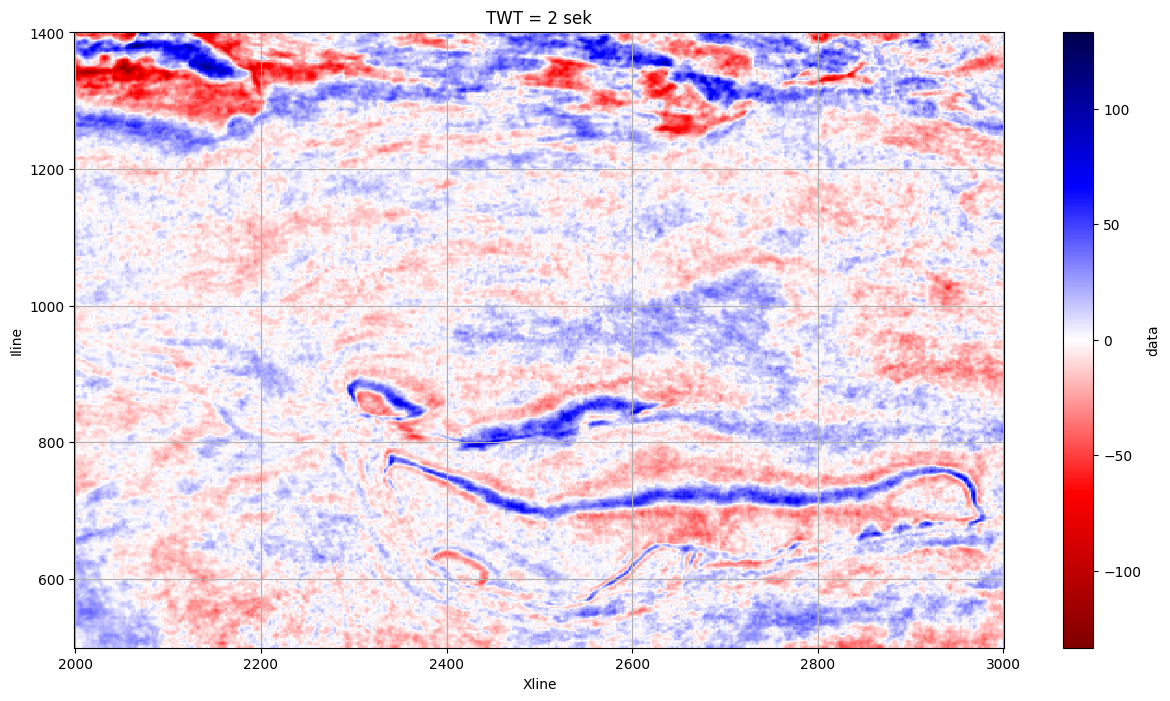

In [74]:
twt_value = 1998
V3D_p = V3D.data.sel(samples=twt_value, method='nearest')

fig, ax = plt.subplots(ncols=1, figsize=(15,8))
V3D_p.transpose("iline", "xline", transpose_coords=True) \
    .plot(ax=ax, cmap='seismic_r')
plt.grid("grey")
plt.ylabel("Iline")
plt.xlabel("Xline")
plt.title(f"TWT = 2 sek")
plt.show()

In [80]:
V3D_np = V3D['data'].transpose("iline", "xline", "samples").values

In [81]:
V3D_np

array([[[ -4.7616096,  -2.3808048,   0.       , ...,  -4.7616096,
          -7.1424146,  -2.3808048],
        [ -4.7616096,  -4.7616096,  -2.3808048, ...,  -7.1424146,
          -4.7616096,  -4.7616096],
        [ -7.1424146,  -4.7616096,  -4.7616096, ...,  -9.523219 ,
          -4.7616096,   0.       ],
        ...,
        [  4.7616096,  -2.3808048,  -4.7616096, ...,  -7.1424146,
          -2.3808048,   0.       ],
        [  7.1424146,   4.7616096,   0.       , ..., -11.904024 ,
          -2.3808048,   4.7616096],
        [  4.7616096,   0.       ,  -4.7616096, ...,  -7.1424146,
           0.       ,   2.3808048]],

       [[  0.       ,   0.       ,   0.       , ...,  -4.7616096,
          -7.1424146,  -4.7616096],
        [ -2.3808048,   0.       ,   2.3808048, ...,  -4.7616096,
          -2.3808048,  -4.7616096],
        [ -4.7616096,  -2.3808048,  -2.3808048, ...,  -9.523219 ,
          -4.7616096,   0.       ],
        ...,
        [  7.1424146,  -2.3808048,  -7.1424146, ...,  